# Defining the Fourier Transform Using Complex Numbers
## Import


In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

## Create and Visualize a combined signal

In [5]:
# 生成一个组合正弦波
def create_signal(frequency, time):
    sin = np.sin(2 * np.pi * (frequency * time))
    sin2 = np.sin(2 * np.pi * (2 * frequency * time))
    sin3 = np.sin(2 * np.pi * (3 * frequency * time))

    return sin + sin2 + sin3

In [14]:
# 音频信号出图
def plot_signal(time, signal):
    plt.figure(figsize=(15, 10))
    plt.plot(time, signal)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()

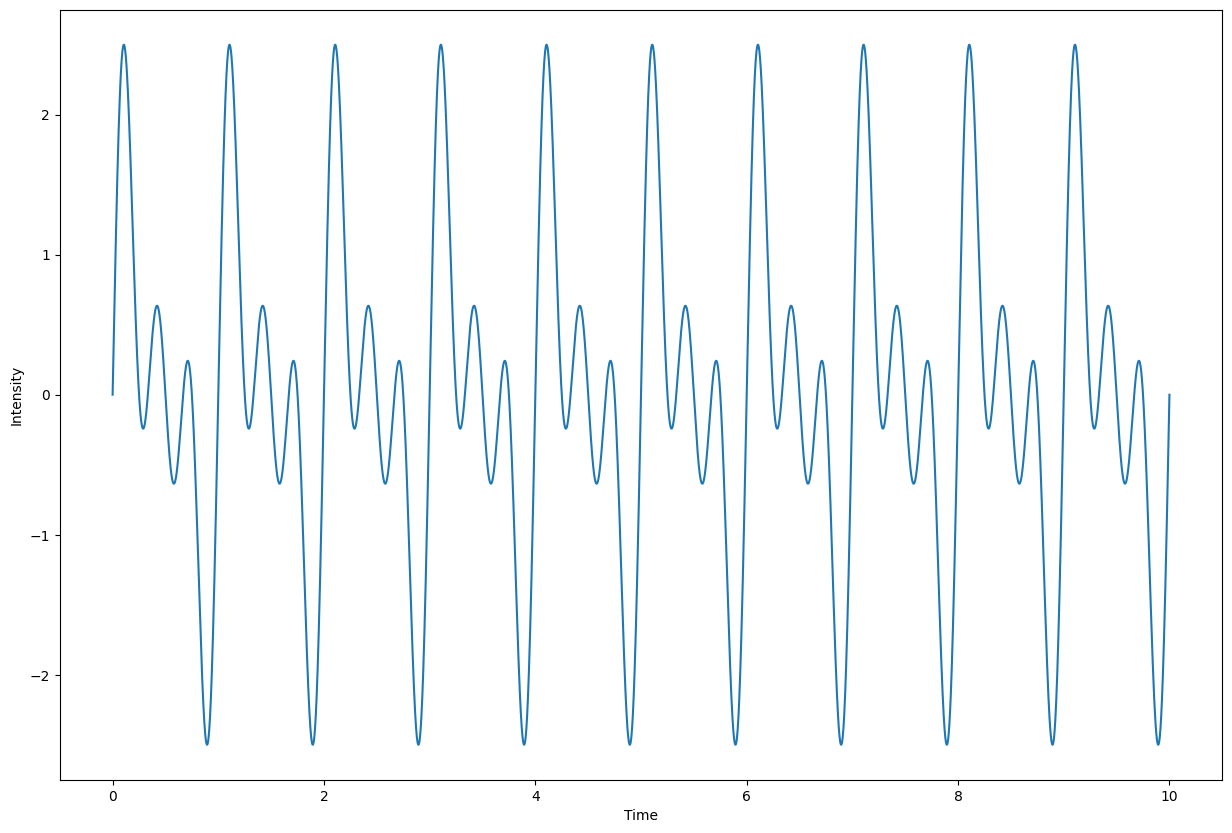

In [86]:
time = np.linspace(0, 10, 10000)
signal = create_signal(frequency=1, time=time)
plot_signal(time, signal)

## Create and visualize a pure tone

In [19]:
# 生成复数形式的纯音信号（正弦波）
def create_pure_tone(frequency, time):
    angle = -2 * np.pi * frequency * time
    return np.cos(angle) + 1j * np.sin(angle)

In [158]:
# 复数域出图
def plot_complex_signal(time, signal):
    plt.figure(figsize=(15, 15))
    plt.plot(signal.real, signal.imag)
    plt.ylabel('Imaginary')
    plt.xlabel('Real')

    fig=plt.figure()
    ax1=plt.axes(projection='3d')

    ax1.set_xlabel('Real part')
    ax1.set_ylabel('Imaginary part')
    ax1.set_zlabel('Time(s)')
    # ax1.scatter(X, Y, time, cmap='Blues') #绘制散点图
    ax1.plot3D(signal.real, signal.imag, time,'red')#绘制空间曲线
    plt.show()

C:\Users\liuqingyu\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


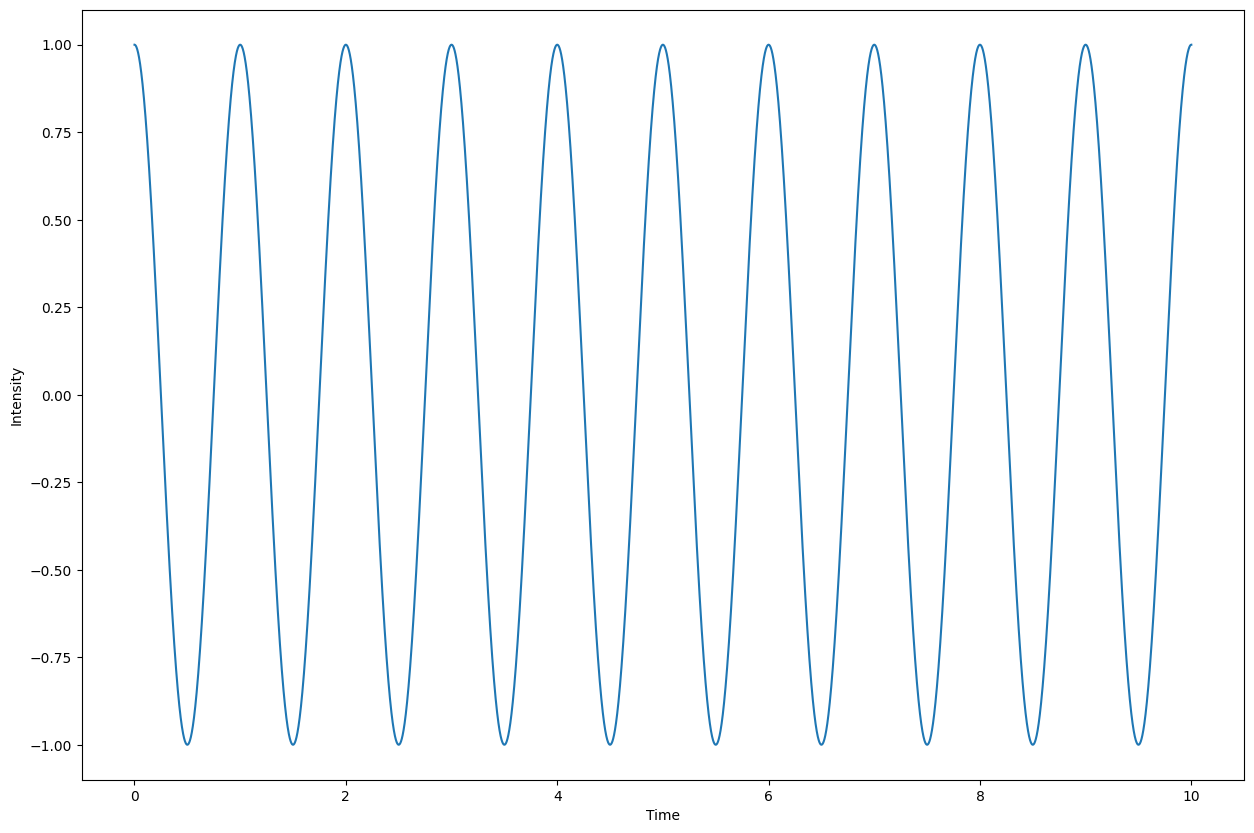

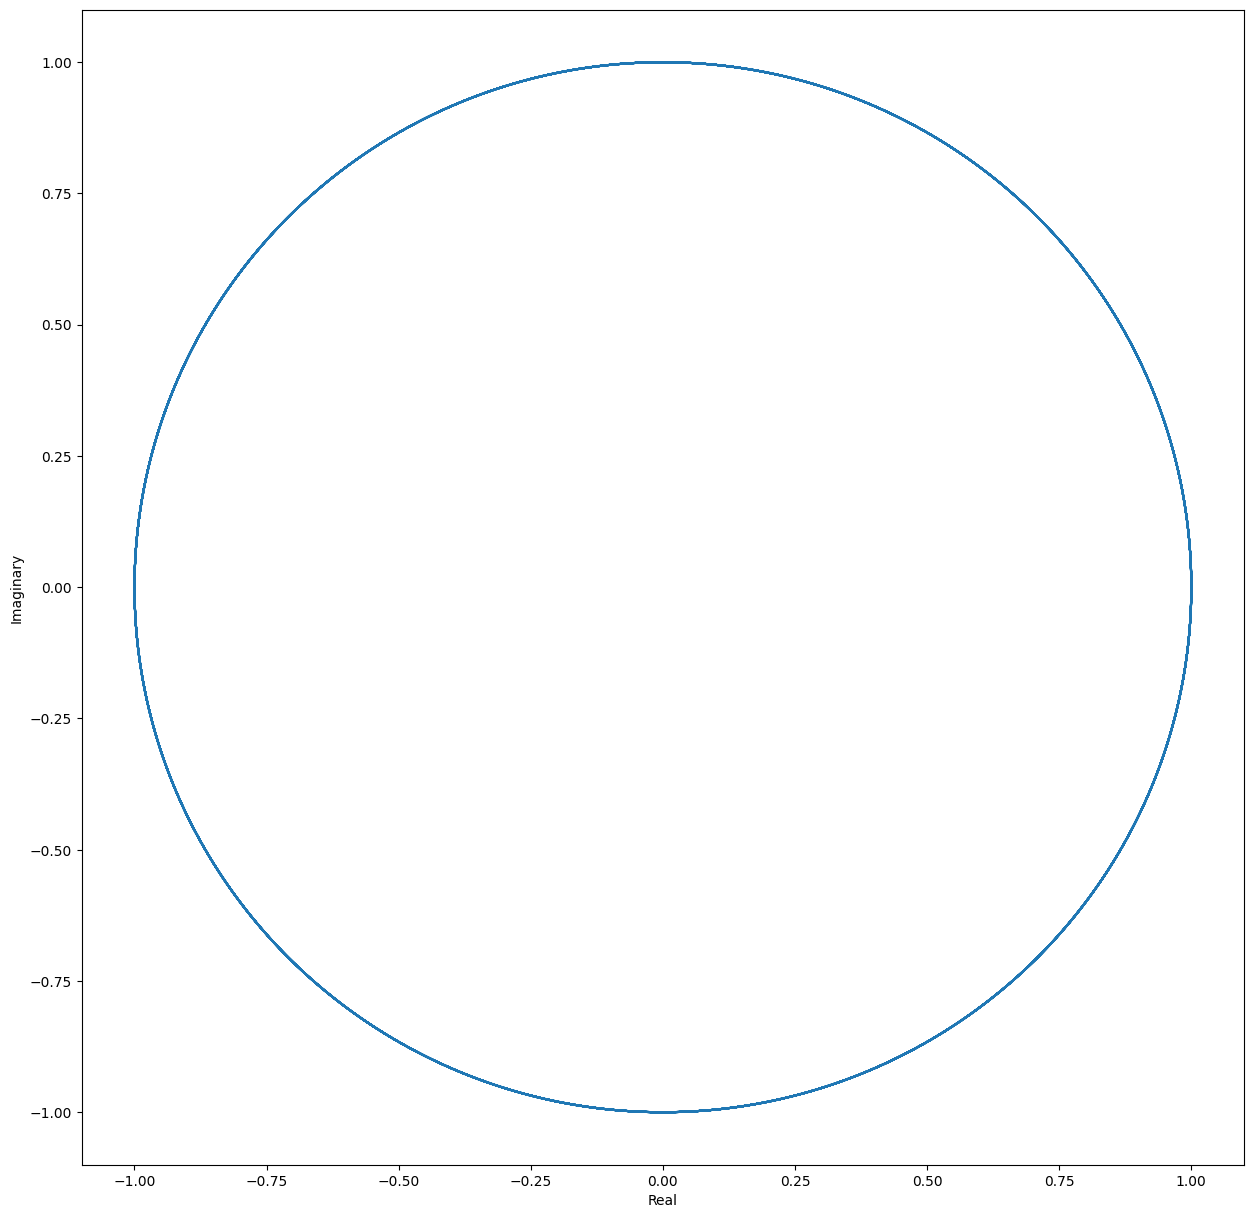

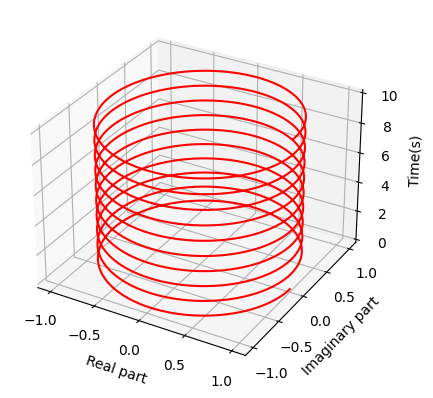

In [159]:
time = np.linspace(0, 10, 10000)
signal = create_pure_tone(frequency=1, time=time)
plot_signal(time, signal)
plot_complex_signal(time, signal)
plt.show()

## Create and visualize a fourier transform

$$\huge \hat{g}(f)=\int g(t)\cdot e^{-i2\pi ft}dt$$

In [88]:
# 计算复数域信号重心
def calculate_centre_of_gravity(mult_signal):
    x_centre = np.mean([x.real for x in mult_signal])
    y_centre = np.mean([x.imag for x in mult_signal])
    return x_centre, y_centre

In [89]:
# 计算复数域信号和
def calculate_sum(mult_signal):
    x_sum = np.sum([x.real for x in mult_signal])
    y_sum = np.sum([x.imag for x in mult_signal])
    return x_sum, y_sum

In [167]:
# 傅里叶变换出图 (2d 复数域)
def plot_fourier_transform(pure_tone_frequency, 
                           signal_frequency, 
                           time, 
                           plot_centre_of_gravity=False,
                           plot_sum=False):
    # 生成原始信号与正弦波
    pure_tone = create_pure_tone(pure_tone_frequency, time)
    signal = create_signal(signal_frequency, time)

    # 原始信号乘以正弦并积分生成复合信号
    multi_signal = pure_tone * signal

    # 取出复合信号的实数部分和虚数部分
    X = [x.real for x in multi_signal]
    Y = [y.imag for y in multi_signal]

    plt.figure(figsize=(15, 10))
    plt.plot(X, Y) # 绘制曲线
    # plt.plot(X, Y, 'o') # 绘制散点图

    # 计算并绘制重心
    if plot_centre_of_gravity:
        centre_of_gravity = calculate_centre_of_gravity(multi_signal)
        plt.plot([centre_of_gravity[0]], [centre_of_gravity[1]], marker='o', markersize=10, color="red")


    # 计算并绘图总和 
    if plot_sum:
        integral = calculate_sum(multi_signal)
        plt.plot([integral[0]], [integral[1]], marker='o', markersize=10, color="green")

    # 坐标轴移动操作，将边框颜色变为无色
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    if not plot_sum:
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)

    plt.show()

In [168]:
# 傅里叶变换出图 (3d 复数域和时间维度)
def plot_fourier_transform2(pure_tone_frequency, 
                           signal_frequency, 
                           time):
    # 生成原始信号与正弦波
    pure_tone = create_pure_tone(pure_tone_frequency, time)
    signal = create_signal(signal_frequency, time)

    # 原始信号乘以正弦并积分生成复合信号
    multi_signal = pure_tone * signal

    # 取出复合信号的实数部分和虚数部分
    X = [x.real for x in multi_signal]
    Y = [y.imag for y in multi_signal]

    #定义坐标轴
    fig=plt.figure()
    ax1=plt.axes(projection='3d')

    ax1.set_xlabel('Real part')
    ax1.set_ylabel('Imaginary part')
    ax1.set_zlabel('Time(s)')
    # ax1.scatter(X, Y, time, cmap='Blues') #绘制散点图
    ax1.plot3D(X, Y, time,'red') #绘制空间曲线

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    plt.show()

可以将下图中的求和点（`plot_sum=True`）视为**指定频率**的复数傅里叶系数，即$\hat{g}(f)$

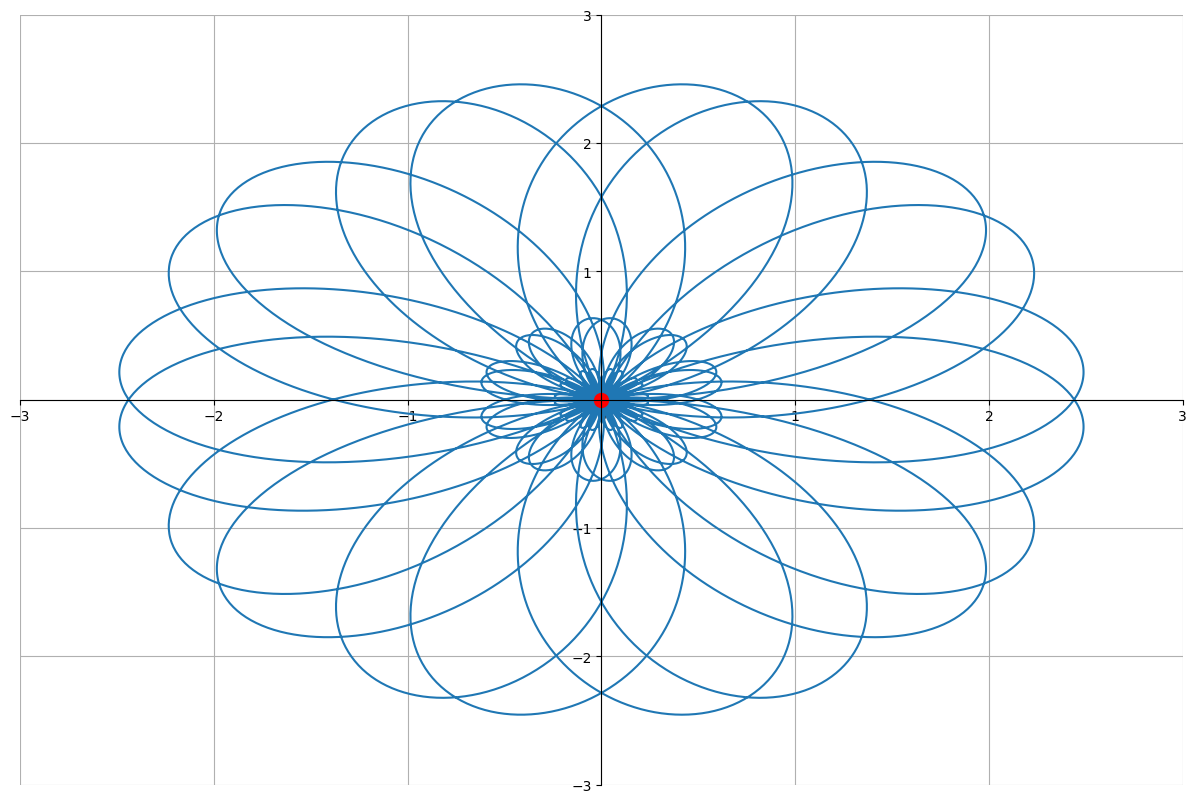

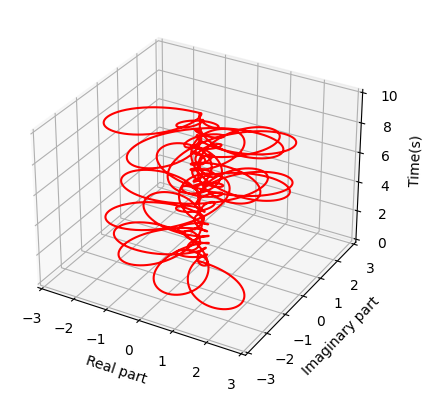

In [174]:
time = np.linspace(0, 10, 10000)
ptf = 1.1
sf = 1
plot_fourier_transform(pure_tone_frequency=ptf, 
                       signal_frequency=sf, 
                       time=time, 
                       plot_centre_of_gravity=True, 
                       plot_sum=False)
plot_fourier_transform2(pure_tone_frequency=ptf, 
                       signal_frequency=sf, 
                       time=time)